In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow import keras 
from tensorflow.keras import layers 
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#loading the dataset into a pandas dataframe
df=pd.read_csv(r"C:\Users\shovi\OneDrive\Desktop\dps\dataset.csv")

In [3]:
#displaying current dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [4]:
#removing data from after 2020
df=df[df['JAHR'] <= 2020]

In [5]:
#displaying current dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
51,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0


In [6]:
#removing unnecessary columns from data
df=df.iloc[:,:5]

In [7]:
#displaying current dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0


In [8]:
#encoding categorical data: representing summer as the 0th month
df.loc[df['MONAT'] == "Summe", 'MONAT'] = 00

In [9]:
#displaying current dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,0,430.0
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0


In [10]:
#function to extract the value of month from "MONAT" column
def extract_month(x):
    m=int(x)%100
    return m

In [11]:
#applying the function to the dataframe
df.MONAT = df.MONAT.apply(extract_month)

In [12]:
#displaying current dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,0,430.0
51,Alkoholunfälle,insgesamt,2020,1,28.0
52,Alkoholunfälle,insgesamt,2020,2,40.0
53,Alkoholunfälle,insgesamt,2020,3,27.0
54,Alkoholunfälle,insgesamt,2020,4,26.0


In [13]:
#function to extract the value of year from "JAHR" column as all values start with 20
def extract_year(x):
    m=int(x)%100
    return m

In [14]:
#applying the function to the dataframe
df.JAHR = df.JAHR.apply(extract_month)

In [15]:
#displaying current dataset
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,20,0,430.0
51,Alkoholunfälle,insgesamt,20,1,28.0
52,Alkoholunfälle,insgesamt,20,2,40.0
53,Alkoholunfälle,insgesamt,20,3,27.0
54,Alkoholunfälle,insgesamt,20,4,26.0


In [16]:
# Creating label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encoding labels in the 'MONATSZAHL' and 'AUSPRAEGUNG' columns
df['MONATSZAHL'] = label_encoder.fit_transform(df['MONATSZAHL'])
df['AUSPRAEGUNG'] = label_encoder.fit_transform(df['AUSPRAEGUNG'])
print(df.head())

    MONATSZAHL  AUSPRAEGUNG  JAHR  MONAT   WERT
50           0            1    20      0  430.0
51           0            1    20      1   28.0
52           0            1    20      2   40.0
53           0            1    20      3   27.0
54           0            1    20      4   26.0


In [17]:
#x consists of the independent variables
#y is the dependent variable
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [18]:
x.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT
50,0,1,20,0
51,0,1,20,1
52,0,1,20,2
53,0,1,20,3
54,0,1,20,4


In [19]:
y.head()

50    430.0
51     28.0
52     40.0
53     27.0
54     26.0
Name: WERT, dtype: float64

In [20]:
#splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42) 

In [21]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1523
1523
381
381


In [22]:
x_train

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT
2023,2,0,17,2
2128,2,0,9,3
439,0,0,15,2
1565,2,1,3,6
1528,2,1,6,8
...,...,...,...,...
1380,2,1,17,3
1544,2,1,5,11
1060,1,0,17,5
1759,2,2,13,8


In [23]:
y_train

2023     334.0
2128     245.0
439        3.0
1565    3139.0
1528    2993.0
         ...  
1380    4106.0
1544    3205.0
1060      60.0
1759     514.0
1376    3550.0
Name: WERT, Length: 1523, dtype: float64

In [41]:
#building the multi-layer perceptron (MLP) with:
#an input layer with 4 neurons (ReLU)
#three hidden layers with 64,32, and 16 neurons respectively (ReLU)
#an output layer with one neuron (Linear)
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=4, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # Linear activation for regression
])

C:\Users\shovi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
#compiling the model with Adam optimizer(learning rate of 0.001) and loss used is mean squared error
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='mse', metrics=['mae'])

In [ ]:
#training the model on our training data in 200 epochs with batch size as 8
history = model.fit(x_train, y_train, epochs=200, batch_size=8, validation_split=0.2)

Epoch 1/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 20776884.0000 - mae: 1318.1179 - val_loss: 13946976.0000 - val_mae: 1305.0212
Epoch 2/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23928462.0000 - mae: 1639.8452 - val_loss: 13523421.0000 - val_mae: 1367.1853
Epoch 3/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22693910.0000 - mae: 1686.2731 - val_loss: 13101010.0000 - val_mae: 1366.8229
Epoch 4/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26458018.0000 - mae: 1857.4414 - val_loss: 12689472.0000 - val_mae: 1200.3345
Epoch 5/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19894948.0000 - mae: 1462.0902 - val_loss: 12312462.0000 - val_mae: 1331.6520
Epoch 6/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22023014.0000 - mae: 1611.4424 - val_loss: 11954685.0000 - val_mae: 1325.5070
Epoch 7/200
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17069394.0000 - mae: 1459.5068 - val_loss: 11947340.0000 - val_mae: 1486.4421
Epoch 8/200
153/153 ━━━━━━━

In [37]:
loss = history.history['loss']
mae = history.history['mae']

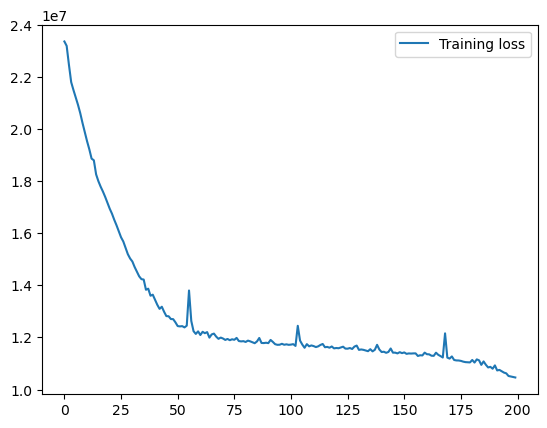

In [38]:
#visualising the loss function over the training process
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

In [39]:
#making predictions
y_pred= model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [40]:
#evaluating the model using r2 score
r2 = r2_score(y_test, y_pred) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.5281937793356357


In [ ]:
# creating an iterator object with write permission - model.pkl
with open(r'C:\Users\shovi\OneDrive\Desktop\dps\model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
#preparing data to make a prediction
#'Alkoholunfälle': 0
#'insgesamt': 1
list1 = [0,1,2020, 1]

# convert the list into dataframe row
data = pd.DataFrame(list1).T
 
# add columns
data.columns = ['MONATSZAHL', 'AUSPRAEGUNG',
                'JAHR', 'MONAT']
 
# display
data

In [ ]:
pred=model.predict(data)

In [ ]:
pred